In [1]:
import pandas as pd
from nltk import word_tokenize
from gensim.models import word2vec
from nltk import FreqDist
from nltk.corpus import stopwords
import string
from sklearn.model_selection import train_test_split
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV

from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer 
from sklearn.naive_bayes import MultinomialNB

from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

import numpy as np

import seaborn as sns

from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.layers import Input,Dense,LSTM,Embedding
from tensorflow.keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

from tensorflow.keras.preprocessing import text,sequence
from tensorflow.keras.utils import to_categorical


import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Biel_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Biel_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Biel_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('tweet_dataset.csv',encoding= 'unicode_escape')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [3]:
#CHECKING EMOTION UNIQUE VALUES AND VALUE COUNTS
print(df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts())

#DROPPING COLUMNS 'I CAN'T TELL' AND NO EMOTION TOWARD BRAND BECAUSE WANT TO MAKE A BINARY CLASSIFICATION
df = df[(df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell")] #& (df['is_there_an_emotion_directed_at_a_brand_or_product'] != 'No emotion toward brand or product')]

#CHANGING NO EMOTION TOWARD BRAND OR PRODUCT TO NO EMOTION
df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].replace({'No emotion toward brand or product':'No emotion'})

# #TURNING EMOTION COLUMN INTO BINARY
# df['Positive_emotion'] = (df['is_there_an_emotion_directed_at_a_brand_or_product']=='Positive emotion').astype(int)
# print(df['Positive_emotion'].value_counts(1))

#DROPPING UNNEEDED COLUMNS
df.drop(['emotion_in_tweet_is_directed_at'],axis=1,inplace=True)

#DROPPING THE 1 NULL VALUE IN COLUMN TWEET_TEXT
df.dropna(inplace=True)

df

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64


C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion
...,...,...
9088,Ipad everywhere. #SXSW {link},Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion
9090,"Google's Zeiger, a physician never reported po...",No emotion
9091,Some Verizon iPhone customers complained their...,No emotion


In [4]:
stopwords_list = stopwords.words('english')

# Add punctuation to stopwords_list
stopwords_list.extend(string.punctuation)

# Add the additional Tweet Punctuation below to stopwords_list
additional_punc = ['“','”','...',"''",'’','``']
stopwords_list.extend(additional_punc)

# VANILLA RANDOM FORREST

In [5]:
rf = RandomForestClassifier(class_weight='balanced')

In [6]:
# y=label_binarize(df['is_there_an_emotion_directed_at_a_brand_or_product'].copy(),
#                  classes = ['Negative emotion','Positive emotion','No emotion toward brand or product'])
y = df['is_there_an_emotion_directed_at_a_brand_or_product'].copy()
X=df['tweet_text'].copy()
X

0       .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1       @jessedee Know about @fludapp ? Awesome iPad/i...
2       @swonderlin Can not wait for #iPad 2 also. The...
3       @sxsw I hope this year's festival isn't as cra...
4       @sxtxstate great stuff on Fri #SXSW: Marissa M...
                              ...                        
9088                        Ipad everywhere. #SXSW {link}
9089    Wave, buzz... RT @mention We interrupt your re...
9090    Google's Zeiger, a physician never reported po...
9091    Some Verizon iPhone customers complained their...
9092    Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...
Name: tweet_text, Length: 8936, dtype: object

In [7]:
#TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=69)

In [8]:
# Check y_train and y_test value counts

y_train.value_counts(1)

No emotion          0.597790
Positive emotion    0.336598
Negative emotion    0.065613
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: float64

In [9]:
tokenizer = nltk.TweetTokenizer(preserve_case=False)
tokenizer

In [10]:
## Make a TfIdf Vectorizer using tweet tokenizer's .tokenize method
vectorizer = TfidfVectorizer(tokenizer=tokenizer.tokenize,
                            stop_words=stopwords_list)

# Vectorize data and make X_train_tfidf and X_test_tfidf
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_train_tfidf

<7148x9320 sparse matrix of type '<class 'numpy.float64'>'
	with 85601 stored elements in Compressed Sparse Row format>

In [11]:
len(vectorizer.vocabulary_)

9320

In [12]:
def model_eval(model,X_train,y_train,X_test,y_test,classes=None,
                           normalize='true',cmap='Blues',label=''):

#         """Example function with PEP 484 type annotations.

#         Args:
#             model: The Model Classifier.
#             X_train: X_train being used to fit model (could be scaled or not).
#             y_train: y_train being used to fit model and to get train accuracy.
#             X_test: X_test to get test predictions.
#             y_test: y_test used to get test accuracy
#             classes: Class labels
#             normalize: set to true
#             cmap: Color scheme for Confusion Matrix. Set to Blues
#             label: Confusion Matrix Label

#         Returns:
#             Model Accuracy. Confusion Matrix, ROC Curve, and best params for GridSearch

#     """
    
    
    #FITTING MODEL WITH TRAIN DATA
    model.fit(X_train,y_train)   
      
    #GETTING TRAIN PREDICTIONS
    y_hat_train = model.predict(X_train)
    
    #GETING TEST PREDICTIONS
    y_hat_test = model.predict(X_test)
    
    dashes = '---'*20
    
    if isinstance(model,GridSearchCV):
        grid_header = "GRID SEARCH FOUND THE FOLLOWING OPTIMAL PARAMETERS: "
        print(dashes,grid_header,dashes,sep='\n')
        best_parameters = model.best_params_
        for param_name in sorted(best_parameters.keys()):
            print("%s: %r" % (param_name, best_parameters[param_name]))
    
    #GETTING ACCURACY SCORE FOR TRAIN AND TEST
    
    if len(label)>0:
        accuracy_header = f'{label} ACCURACY'
    else:
        accuracy_header = 'MODEL ACCURACY'
    print(dashes,accuracy_header,dashes,sep='\n')
    training_accuracy = accuracy_score(y_train, y_hat_train)
    testing_accuracy = accuracy_score(y_test, y_hat_test)
    
    print(f'TRAINING ACCURACY: {round(training_accuracy*100,2)}%')
    print(f'TESTING ACCURACY: {round(testing_accuracy*100,2)}%')
          
    #CLASSIFICATION REPORT AND SCORES
    test_header = "CLASSIFICATION REPORT"
    
    #ADDING LABEL IF GIVEN
    if len(label)>0:
        test_header += f" USING {label}"
    
    # PRINT CLASSIFICATION REPORT
    
    print(dashes,test_header,dashes,sep='\n')

    print(metrics.classification_report(y_test,y_hat_test,
                                    target_names=classes))

    print(dashes+"\n\n")
    
    

    # MAKE FIGURE
    fig, axes = plt.subplots(figsize=(10,10),ncols=1)
   

    # PLOTTING CONFUSION MATRIX 
    if isinstance(model,GridSearchCV):
        metrics.plot_confusion_matrix(model.best_estimator_, X_test,y_test,
                                      display_labels=classes,
                                      normalize=normalize,
                                     cmap=cmap,ax=axes,xticks_rotation=45)
        axes.set(title='Confusion Matrix')
    else:
        metrics.plot_confusion_matrix(model, X_test,y_test,
                                      display_labels=classes,
                                      normalize=normalize,
                                     cmap=cmap,ax=axes,xticks_rotation=45)
        axes.set(title='Confusion Matrix')
    
    #PLOTTING ROC CURVE
#     roc_plot = metrics.plot_roc_curve(model, X_test, y_test,ax=axes[1])
#     axes[1].legend()
#     axes[1].plot([0,1],[0,1],ls=':')
#     axes[1].grid()
#     axes[1].set_title('Receiving Operator Characteristic (ROC) Curve') 
    fig.tight_layout()
    plt.show()

   

------------------------------------------------------------
MODEL ACCURACY
------------------------------------------------------------
TRAINING ACCURACY: 99.55%
TESTING ACCURACY: 70.41%
------------------------------------------------------------
CLASSIFICATION REPORT
------------------------------------------------------------
                  precision    recall  f1-score   support

Negative emotion       0.74      0.23      0.35       101
      No emotion       0.72      0.88      0.79      1115
Positive emotion       0.65      0.44      0.52       572

        accuracy                           0.70      1788
       macro avg       0.70      0.52      0.55      1788
    weighted avg       0.70      0.70      0.68      1788

------------------------------------------------------------




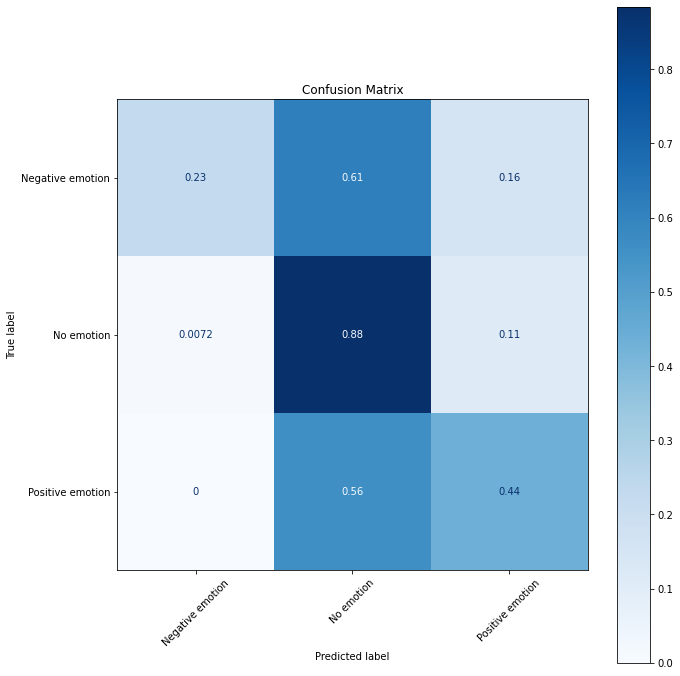

In [13]:
## Evaluate Model using function
model_eval(rf,X_train_tfidf,y_train,X_test_tfidf,y_test)

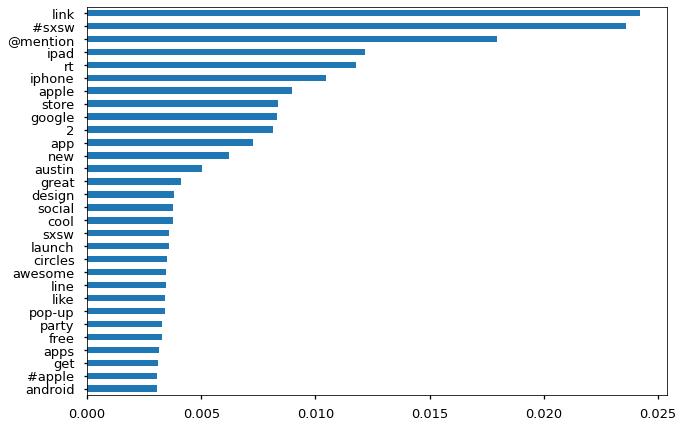

In [14]:
# Plot the top 30 most important features
with plt.style.context('seaborn-talk'):

    ## Get Feature Importance
    importance = pd.Series(rf.feature_importances_,index=vectorizer.get_feature_names())

    ## Sort values 


    ## Take the .tail 30 and plot kind='barh'
    importance.sort_values().tail(30).plot(kind='barh')

In [15]:
count_vect = CountVectorizer()
tf_transform = TfidfTransformer(use_idf=True)
lemmatizer = WordNetLemmatizer()

text_pipe = Pipeline(steps=[                       
    ('count_vectorizer',count_vect),
    ('tf_transformer',tf_transform)])

full_pipe = Pipeline(steps=[
    ('text_pipe',text_pipe),
    ('clf',RandomForestClassifier(class_weight='balanced'))
])
full_pipe

Pipeline(steps=[('text_pipe',
                 Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                                 ('tf_transformer', TfidfTransformer())])),
                ('clf', RandomForestClassifier(class_weight='balanced'))])

In [16]:
params = {'text_pipe__tf_transformer__use_idf':[True, False],
         'text_pipe__count_vectorizer__tokenizer':[None,tokenizer.tokenize],
          'text_pipe__count_vectorizer__preprocessor':[None,lemmatizer.lemmatize],
         'text_pipe__count_vectorizer__stop_words':[None,stopwords_list],
         'clf__criterion':['gini', 'entropy']}

## Make and fit grid
grid = GridSearchCV(full_pipe,params,cv=3)

In [17]:
# model_eval(grid,X_train,y_train,X_test,y_test)

# DEEP NLP

In [18]:
#TRAINING WORD2VEC FROM FULL DF AND APPLYING SIMPLE PREPROCESSING
lower_df=df['tweet_text'].map(lambda x: simple_preprocess(x.lower(),deacc=True,
                                                         max_len=100))

print(df['tweet_text'][0])
print('/n')
print(lower_df[0])

.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.
/n
['wesley', 'have', 'iphone', 'after', 'hrs', 'tweeting', 'at', 'rise_austin', 'it', 'was', 'dead', 'need', 'to', 'upgrade', 'plugin', 'stations', 'at', 'sxsw']


In [19]:
wv_model = Word2Vec(lower_df,size=100,window=5,min_count=1)

In [20]:
wv_model.train(lower_df,total_examples=wv_model.corpus_count,epochs=100)

W0112 22:11:19.362678 22236 base_any2vec.py:1168] Effective 'alpha' higher than previous training cycles


(10555591, 15425100)

In [21]:
#GET KEYED VECTOR
wv=wv_model.wv
wv

In [22]:
wv['tweet']

array([ 3.0026217e+00,  1.1995547e+00, -2.6427164e+00,  1.6952482e+00,
       -2.2426353e-01, -1.0376961e+00,  7.8113660e-02, -1.8435597e-01,
        2.2802997e+00,  5.3421230e+00,  2.0674175e-01, -3.1630781e-01,
        3.1546357e+00, -7.9995614e-01,  6.4600885e-01, -6.1649263e-01,
       -1.1272380e+00, -1.1589040e-01,  1.1794894e+00,  1.4469327e+00,
        3.8190034e-01,  1.8925595e+00, -3.0104856e+00,  2.5696876e+00,
        8.6372936e-01,  9.3197560e-01, -5.4916275e-01, -1.7553433e+00,
       -6.5594039e+00,  7.2503708e-02,  2.3127542e-01,  2.4072509e+00,
        1.1435697e+00, -2.7613900e+00,  2.0741196e+00, -2.9655516e+00,
        2.2040132e-01,  2.7870636e+00,  2.2369611e+00, -1.4161615e+00,
       -1.5973573e+00,  2.3801883e-01,  9.6712160e-01, -2.3788979e+00,
        6.9877672e-01,  1.4574057e+00, -2.2083921e+00, -1.6420842e+00,
        5.3989053e-01,  1.0348945e+00,  1.5004565e+00, -7.8491968e-01,
        1.5348960e+00, -2.1946166e+00,  1.6340705e+00,  1.0526371e+00,
      

In [23]:
len(wv.vocab)

9264

In [24]:
wv.most_similar('great')

[('fastest', 0.3528936505317688),
 ('design', 0.33434322476387024),
 ('visualizing', 0.32526031136512756),
 ('excellent', 0.32126158475875854),
 ('rainbow', 0.3208981156349182),
 ('nice', 0.3076115846633911),
 ('fun', 0.30702686309814453),
 ('argh', 0.30472928285598755),
 ('ux', 0.301527202129364),
 ('removable', 0.28384095430374146)]

In [25]:
# y=label_binarize(df['is_there_an_emotion_directed_at_a_brand_or_product'].copy(),
#                  classes = ['Negative emotion','Positive emotion','No emotion toward brand or product'])
y = df['is_there_an_emotion_directed_at_a_brand_or_product'].replace({'Negative emotion':0,
                                                                     'Positive emotion':1,
                                                                     'No emotion':2})
X=df['tweet_text'].copy()

In [26]:
#TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=999)

In [27]:
from sklearn.utils.class_weight import compute_class_weight

weights = compute_class_weight('balanced',np.unique(y_train),y_train)

weights_dict = dict(zip(np.unique(y_train),weights))
weights_dict

C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1 2], y=4777    2
6112    2
6010    2
3318    2
884     1
       ..
8554    2
7713    2
8562    1
5936    1
490     1
Name: is_there_an_emotion_directed_at_a_brand_or_product, Length: 7148, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


{0: 5.124014336917563, 1: 1.0083227535618564, 2: 0.5515432098765433}

In [28]:
#ONE HOT ENCODE
y_train_seq=label_binarize(y_train,
                 classes = [0,1,2])

y_test_seq=label_binarize(y_test,
                 classes = [0,1,2])
y_train_seq.shape

(7148, 3)

In [29]:
#TOKENIZE TEXT
MAX_WORDS=25000
tokenizer = text.Tokenizer(num_words = MAX_WORDS)
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

#FIND LONGEST SEQUENCE
max(list(map(lambda x:len(x),[*train_sequences,*test_sequences])))

MAX_SEQUENCE_LENGTH=40

In [30]:
X_train_seq = sequence.pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH)

X_test_seq = sequence.pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH)

X_train_seq

array([[   0,    0,    0, ...,   37,    4,    2],
       [   0,    0,    0, ..., 2197,   78,  261],
       [   0,    0,    0, ...,   26,  129,    4],
       ...,
       [   0,    0,    0, ...,   67,  229,    1],
       [   0,    0,    0, ..., 1551,   96,    1],
       [   0,    0,    0, ...,  244,  161, 9049]])

In [31]:
len(tokenizer.index_word)

9049

In [32]:
def get_earlystop(monitor='val_loss',patience=3, restore_best_weights=False):
    """"""""
    args = locals()
    return EarlyStopping(**args)
get_earlystop.__doc__+= EarlyStopping.__doc__

In [33]:
def make_model(EMBEDDING_SIZE=128):
    model=Sequential()
    model.add(Embedding(MAX_WORDS,EMBEDDING_SIZE))
    model.add(LSTM(50,return_sequences=True))
#     model.add(LSTM(25,return_sequences=False))

    model.add(LSTM(50,return_sequences=False,recurrent_dropout=0.3))
    model.add(Dense(50,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    display(model.summary())
    return model
model = make_model()
history = model.fit(X_train_seq, y_train_seq, epochs=50,batch_size=32, 
                    validation_split = 0.3, callbacks=get_earlystop(),
                   class_weight=weights_dict,workers=3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         3200000   
_________________________________________________________________
lstm (LSTM)                  (None, None, 50)          35800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 50)                2550      
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 153       
Total params: 3,258,703
Trainable params: 3,258,703
Non-trainable params: 0
______________________________________________

None

Epoch 1/50
157/157 [==============================] - 11s 67ms/step - loss: 1.2849 - accuracy: 0.4000 - val_loss: 0.9760 - val_accuracy: 0.5678
Epoch 2/50
157/157 [==============================] - 10s 65ms/step - loss: 0.8429 - accuracy: 0.6478 - val_loss: 0.8808 - val_accuracy: 0.6275
Epoch 3/50
157/157 [==============================] - 11s 70ms/step - loss: 0.5120 - accuracy: 0.7817 - val_loss: 0.8717 - val_accuracy: 0.6326
Epoch 4/50
157/157 [==============================] - 11s 70ms/step - loss: 0.3630 - accuracy: 0.8453 - val_loss: 0.9308 - val_accuracy: 0.6392
Epoch 5/50
157/157 [==============================] - 11s 69ms/step - loss: 0.2978 - accuracy: 0.8777 - val_loss: 1.0404 - val_accuracy: 0.6331
Epoch 6/50
157/157 [==============================] - 11s 69ms/step - loss: 0.2515 - accuracy: 0.8943 - val_loss: 1.0344 - val_accuracy: 0.6583


In [34]:
y_hat_test = model.predict(X_test_seq).argmax(axis=1)
y_hat_test[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [35]:
# def plot_confusion_matrix( classes,
#                         normalize=False,
#                         title='Confusion matrix',
#                         cmap=plt.cm.Blues,
#                          ):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     print(metrics.classification_report(y_test,y_hat_test))
#     print('\n')
    
#     cm = confusion_matrix(y_true=y_test, y_pred=y_hat_test,normalize=normalize)
    
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar(ax=ax)
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, round(cm[i, j],2),
#             horizontalalignment="center",
#             color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
    
    

In [36]:
def model_eval_2(y_test,y_hat_test,classes=None,
                           normalize='true',cmap='Blues',label='',
                           title='Confusion matrix'):

#         """Example function with PEP 484 type annotations.

#         Args:
#             model: The Model Classifier.
#             X_train: X_train being used to fit model (could be scaled or not).
#             y_train: y_train being used to fit model and to get train accuracy.
#             X_test: X_test to get test predictions.
#             y_test: y_test used to get test accuracy
#             classes: Class labels
#             normalize: set to true
#             cmap: Color scheme for Confusion Matrix. Set to Blues
#             label: Confusion Matrix Label

#         Returns:
#             Model Accuracy. Confusion Matrix, ROC Curve, and best params for GridSearch

#     """
    
    dashes = '---'*20

    #GETTING ACCURACY SCORE FOR TRAIN AND TEST
    
    if len(label)>0:
        accuracy_header = f'{label} ACCURACY'
    else:
        accuracy_header = 'MODEL ACCURACY'
    print(dashes,accuracy_header,dashes,sep='\n')
#     training_accuracy = accuracy_score(y_train, y_hat_train)
    testing_accuracy = accuracy_score(y_test, y_hat_test)
    
#     print(f'TRAINING ACCURACY: {round(training_accuracy*100,2)}%')
    print(f'TESTING ACCURACY: {round(testing_accuracy*100,2)}%')
          
    #CLASSIFICATION REPORT AND SCORES
    test_header = "CLASSIFICATION REPORT"
    
    #ADDING LABEL IF GIVEN
    if len(label)>0:
        test_header += f" USING {label}"
    
    # PRINT CLASSIFICATION REPORT
    
    print(dashes,test_header,dashes,sep='\n')

    print(metrics.classification_report(y_test,y_hat_test))#,
#                                     target_names=classes))

    print(dashes+"\n\n")
        
    # MAKE FIGURE
    fig, axes = plt.subplots(figsize=(15,5),ncols=3)      
   

    # PLOTTING CONFUSION MATRIX 

    cm = confusion_matrix(y_true=y_test, y_pred=y_hat_test,normalize=normalize)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(ax=axes[2])
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],2),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    history_df = pd.DataFrame(history.history)
#     plt.subplot(history_df[[col for col in history_df.columns if 'loss' in col]])

    loss_df = history_df[[col for col in history_df.columns if 'loss' in col]]
    loss_df = loss_df.reset_index()
    
    acc_df = history_df[[col for col in history_df.columns if 'acc' in col]]
    acc_df = acc_df.reset_index()
    
    sns.lineplot(x='index',y='val_loss',data=loss_df,markers='o',ax=axes[0])
    sns.lineplot(x='index',y='loss',data=loss_df,markers='o',ax=axes[0])
    
    sns.lineplot(x='index',y='val_accuracy',data=acc_df,markers='o',ax=axes[1])
    sns.lineplot(x='index',y='accuracy',data=acc_df,markers='o',ax=axes[1])
    
    fig.tight_layout()
    plt.show()

   

------------------------------------------------------------
MODEL ACCURACY
------------------------------------------------------------
TESTING ACCURACY: 64.77%
------------------------------------------------------------
CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.28      0.34      0.31       105
           1       0.58      0.53      0.56       615
           2       0.72      0.74      0.73      1068

    accuracy                           0.65      1788
   macro avg       0.53      0.54      0.53      1788
weighted avg       0.65      0.65      0.65      1788

------------------------------------------------------------




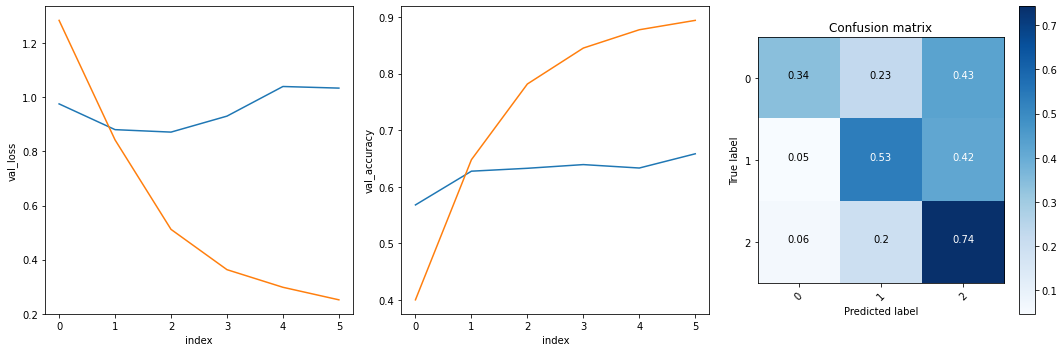

In [37]:
model_eval_2(y_test,y_hat_test,classes=[0,1,2])

In [38]:
# from sklearn.metrics import confusion_matrix
# import itertools

# cm = confusion_matrix(y_true=y_test, y_pred=y_hat_test,normalize='true')

# fig, axes = plt.subplots(figsize=(10,10),ncols=2)

# print(metrics.classification_report(y_test,y_hat_test))
# print('\n')
# history_df = pd.DataFrame(history.history)
# history_df[[col for col in history_df.columns if 'loss' in col]].plot(marker='o')

# plot_confusion_matrix(cm,classes=[0,1,2],normalize=True,ax=axes[1])

In [39]:
# from tensorflow.keras.layers import Embedding


# #FUNCTION SOURCE >>> https://github.com/RaRe-Technologies/gensim/wiki/Using-Gensim-Embeddings-with-Keras-and-Tensorflow
# def gensim_to_keras_embedding(model, train_embeddings=False):
#     """Get a Keras 'Embedding' layer with weights set from Word2Vec model's learned word embeddings.

#     Parameters
#     ----------
#     train_embeddings : bool
#         If False, the returned weights are frozen and stopped from being updated.
#         If True, the weights can / will be further updated in Keras.

#     Returns
#     -------
#     `keras.layers.Embedding`
#         Embedding layer, to be used as input to deeper network layers.

#     """
#     keyed_vectors = model.wv  # structure holding the result of training
#     weights = keyed_vectors.vectors  # vectors themselves, a 2D numpy array    
#     index_to_key = keyed_vectors.index2word  # which row in `weights` corresponds to which word?

#     layer = Embedding(
#         input_dim=weights.shape[0],
#         output_dim=weights.shape[1],
#         weights=[weights],
#         trainable=train_embeddings,
#     )
#     return layer
# gensim_to_keras_embedding(wv_model)

In [40]:
def make_model_w2v(wv):
    model=Sequential()
    
    model.add(wv.get_keras_embedding())
    model.add(LSTM(50,return_sequences=True))
#     model.add(LSTM(25,return_sequences=False))

    model.add(LSTM(50,return_sequences=False,recurrent_dropout=0.3))
    model.add(Dense(50,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    display(model.summary())
    return model
model = make_model_w2v(wv)
history = model.fit(X_train_seq, y_train_seq, epochs=50,batch_size=32, validation_split = 0.2, callbacks=get_earlystop(),class_weight=weights_dict)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         926400    
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 50)          30200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 153       
Total params: 979,503
Trainable params: 53,103
Non-trainable params: 926,400
___________________________________________

None

Epoch 1/50
179/179 [==============================] - 9s 48ms/step - loss: 1.3222 - accuracy: 0.4384 - val_loss: 1.2230 - val_accuracy: 0.4175
Epoch 2/50
179/179 [==============================] - 8s 45ms/step - loss: 1.0146 - accuracy: 0.4904 - val_loss: 1.0371 - val_accuracy: 0.4601
Epoch 3/50
179/179 [==============================] - 8s 46ms/step - loss: 0.8707 - accuracy: 0.5560 - val_loss: 1.0008 - val_accuracy: 0.4888
Epoch 4/50
179/179 [==============================] - 8s 45ms/step - loss: 0.7508 - accuracy: 0.5978 - val_loss: 0.9440 - val_accuracy: 0.5573
Epoch 5/50
179/179 [==============================] - 8s 46ms/step - loss: 0.6828 - accuracy: 0.6350 - val_loss: 0.9012 - val_accuracy: 0.5734
Epoch 6/50
179/179 [==============================] - 8s 45ms/step - loss: 0.6008 - accuracy: 0.6754 - val_loss: 0.9890 - val_accuracy: 0.5650
Epoch 7/50
179/179 [==============================] - 8s 45ms/step - loss: 0.5364 - accuracy: 0.7078 - val_loss: 0.9771 - val_accuracy: 0.5692

------------------------------------------------------------
MODEL ACCURACY
------------------------------------------------------------
TESTING ACCURACY: 61.52%
------------------------------------------------------------
CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.26      0.31      0.29       105
           1       0.51      0.58      0.54       615
           2       0.73      0.67      0.70      1068

    accuracy                           0.62      1788
   macro avg       0.50      0.52      0.51      1788
weighted avg       0.63      0.62      0.62      1788

------------------------------------------------------------




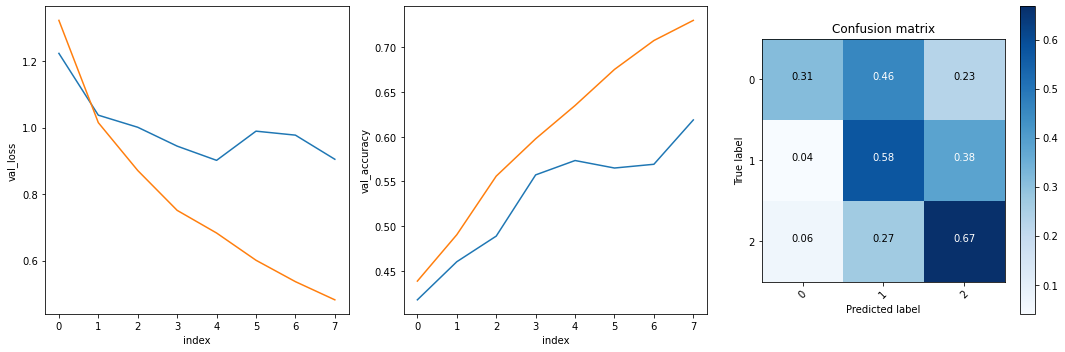

In [41]:
y_hat_test = model.predict(X_test_seq).argmax(axis=1)
model_eval_2(y_test,y_hat_test,classes=[0,1,2])